In [1]:
import numpy as np
import pandas as pd
from sklearn import tree

In [2]:
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from pandas.tools.plotting import autocorrelation_plot

In [3]:
plant_data = pd.read_excel('JAN_18_OEC22_LV1_1st set of data to Analyse_Sankarshan.xlsx')

In [4]:
plant_data.head()

,Time,Pane1-FP P9300A Outlet Pressure,Pane1-FP P9300B Outlet Pressure,Pane1-MF Super Heat Temp L1,Pane1-Feed Pump A Net Positive Suction Head,Pane1-Feed Pump B Net Positive Suction Head,Pane1-Feed Pump P-9300A Power,Pane1-Feed Pump P-9300B Power,Pane1-FP P9300A Vibration,Pane1-FP P9300B Vibration
0,2018-01-01 00:01:00,278.407263,277.702885,4.120663,13.908867,14.667767,276.317995,266.785528,4.840514,6.135158
1,2018-01-01 00:30:59,278.387177,277.684955,4.151361,14.563168,14.292004,276.452612,266.308472,4.809676,6.110008
2,2018-01-01 01:00:59,278.346576,277.646523,4.220182,15.659578,14.039570,276.605082,265.566724,4.771413,6.131669
3,2018-01-01 01:30:59,278.305975,277.608090,4.309535,16.994109,13.853562,276.757552,264.824976,4.733151,6.153331
4,2018-01-01 02:00:59,278.372694,277.682182,4.398887,18.328640,13.667554,276.530350,264.514418,4.714929,6.176943


In [5]:
plant_data_non_NA = plant_data.dropna()

In [6]:
plant_data_non_NA.head()

,Time,Pane1-FP P9300A Outlet Pressure,Pane1-FP P9300B Outlet Pressure,Pane1-MF Super Heat Temp L1,Pane1-Feed Pump A Net Positive Suction Head,Pane1-Feed Pump B Net Positive Suction Head,Pane1-Feed Pump P-9300A Power,Pane1-Feed Pump P-9300B Power,Pane1-FP P9300A Vibration,Pane1-FP P9300B Vibration
0,2018-01-01 00:01:00,278.407263,277.702885,4.120663,13.908867,14.667767,276.317995,266.785528,4.840514,6.135158
1,2018-01-01 00:30:59,278.387177,277.684955,4.151361,14.563168,14.292004,276.452612,266.308472,4.809676,6.110008
2,2018-01-01 01:00:59,278.346576,277.646523,4.220182,15.659578,14.039570,276.605082,265.566724,4.771413,6.131669
3,2018-01-01 01:30:59,278.305975,277.608090,4.309535,16.994109,13.853562,276.757552,264.824976,4.733151,6.153331
4,2018-01-01 02:00:59,278.372694,277.682182,4.398887,18.328640,13.667554,276.530350,264.514418,4.714929,6.176943


In [7]:
plant_data_non_NA['Pane1-Feed Pump A Net Positive Suction Head'].min(), plant_data_non_NA['Pane1-Feed Pump A Net Positive Suction Head'].max()

(3.02669, 47.505856)

In [8]:
plant_data_non_NA['Pane1-Feed Pump B Net Positive Suction Head'].min(), plant_data_non_NA['Pane1-Feed Pump B Net Positive Suction Head'].max()

(-0.003125, 39.108885)

In [9]:
plant_data_non_NA[plant_data_non_NA['Pane1-Feed Pump B Net Positive Suction Head'] < 2]

,Time,Pane1-FP P9300A Outlet Pressure,Pane1-FP P9300B Outlet Pressure,Pane1-MF Super Heat Temp L1,Pane1-Feed Pump A Net Positive Suction Head,Pane1-Feed Pump B Net Positive Suction Head,Pane1-Feed Pump P-9300A Power,Pane1-Feed Pump P-9300B Power,Pane1-FP P9300A Vibration,Pane1-FP P9300B Vibration
1127,2018-01-24 11:29:29,64.304218,68.989774,26.162443,3.026690,1.254015,74.592287,26.600662,1.590688,0.996458
1128,2018-01-24 11:59:29,84.387397,90.481584,24.409178,7.216144,1.290751,103.235147,29.538805,2.184364,1.151882
1129,2018-01-24 12:29:28,104.567941,111.680584,22.655914,11.405599,1.327488,138.609901,28.359200,2.834052,1.307306
1130,2018-01-24 12:59:28,143.192663,77.410990,24.022120,14.578642,1.114137,191.036902,16.749121,3.625618,0.934243
1131,2018-01-24 13:29:28,181.817384,43.141395,28.019252,16.605286,0.618715,243.463901,5.139043,4.417185,0.466059
1132,2018-01-24 13:59:28,207.758534,18.903331,32.016384,18.631930,0.123293,266.269223,0.045238,4.782245,0.106930
1133,2018-01-24 14:29:28,202.957374,18.979585,32.867252,18.239202,0.002415,265.550173,0.126401,4.808591,0.532159
1134,2018-01-24 14:59:28,198.156214,19.055840,32.640231,17.017615,0.009854,264.831122,0.207564,4.834937,0.957389
1135,2018-01-24 15:29:28,191.267767,18.556976,32.394776,15.752377,0.016999,261.489247,0.153678,4.796799,1.118952
1136,2018-01-24 15:59:28,182.860977,17.639759,29.415716,12.315603,0.009560,257.617627,0.072514,4.745637,0.879478


In [10]:
plant_data_non_NA['Pane1-Feed Pump P-9300A Power'].min(), plant_data_non_NA['Pane1-Feed Pump P-9300A Power'].max()

(74.592287, 281.058168)

In [11]:
plant_data_non_NA['Pane1-Feed Pump P-9300B Power'].min(), plant_data_non_NA['Pane1-Feed Pump P-9300B Power'].max()

(0.0, 284.022812)

In [12]:
plant_data_non_NA['Pane1-FP P9300A Vibration'].min(), plant_data_non_NA['Pane1-FP P9300A Vibration'].max()

(1.590688, 5.001793)

In [13]:
plant_data_non_NA['Pane1-FP P9300B Vibration'].min(), plant_data_non_NA['Pane1-FP P9300B Vibration'].max()

(0.0, 8.419991)

In [14]:
plant_data_non_NA['Pane1-Feed Pump P-9300A Power'].mean(), plant_data_non_NA['Pane1-Feed Pump P-9300A Power'].std()

(271.92033636682396, 10.992257461951434)

In [15]:
plant_data_non_NA[plant_data_non_NA['Pane1-Feed Pump P-9300A Power'] == plant_data_non_NA['Pane1-Feed Pump P-9300A Power'].min()]

,Time,Pane1-FP P9300A Outlet Pressure,Pane1-FP P9300B Outlet Pressure,Pane1-MF Super Heat Temp L1,Pane1-Feed Pump A Net Positive Suction Head,Pane1-Feed Pump B Net Positive Suction Head,Pane1-Feed Pump P-9300A Power,Pane1-Feed Pump P-9300B Power,Pane1-FP P9300A Vibration,Pane1-FP P9300B Vibration
1127,2018-01-24 11:29:29,64.304218,68.989774,26.162443,3.02669,1.254015,74.592287,26.600662,1.590688,0.996458


In [16]:
plant_data_non_NA['Pane1-Feed Pump P-9300A Power'].describe()

count    1483.000000
mean      271.920336
std        10.992257
min        74.592287
25%       270.721494
50%       274.122842
75%       276.871213
max       281.058168
Name: Pane1-Feed Pump P-9300A Power, dtype: float64

In [17]:
plant_data_non_NA[plant_data_non_NA['Pane1-Feed Pump P-9300A Power'] < 2*plant_data_non_NA['Pane1-Feed Pump P-9300A Power'].min()]

,Time,Pane1-FP P9300A Outlet Pressure,Pane1-FP P9300B Outlet Pressure,Pane1-MF Super Heat Temp L1,Pane1-Feed Pump A Net Positive Suction Head,Pane1-Feed Pump B Net Positive Suction Head,Pane1-Feed Pump P-9300A Power,Pane1-Feed Pump P-9300B Power,Pane1-FP P9300A Vibration,Pane1-FP P9300B Vibration
1127,2018-01-24 11:29:29,64.304218,68.989774,26.162443,3.026690,1.254015,74.592287,26.600662,1.590688,0.996458
1128,2018-01-24 11:59:29,84.387397,90.481584,24.409178,7.216144,1.290751,103.235147,29.538805,2.184364,1.151882
1129,2018-01-24 12:29:28,104.567941,111.680584,22.655914,11.405599,1.327488,138.609901,28.359200,2.834052,1.307306


In [18]:
plant_data_non_NA[plant_data_non_NA['Pane1-Feed Pump P-9300A Power'] < 3*plant_data_non_NA['Pane1-Feed Pump P-9300A Power'].min()]

,Time,Pane1-FP P9300A Outlet Pressure,Pane1-FP P9300B Outlet Pressure,Pane1-MF Super Heat Temp L1,Pane1-Feed Pump A Net Positive Suction Head,Pane1-Feed Pump B Net Positive Suction Head,Pane1-Feed Pump P-9300A Power,Pane1-Feed Pump P-9300B Power,Pane1-FP P9300A Vibration,Pane1-FP P9300B Vibration
1127,2018-01-24 11:29:29,64.304218,68.989774,26.162443,3.026690,1.254015,74.592287,26.600662,1.590688,0.996458
1128,2018-01-24 11:59:29,84.387397,90.481584,24.409178,7.216144,1.290751,103.235147,29.538805,2.184364,1.151882
1129,2018-01-24 12:29:28,104.567941,111.680584,22.655914,11.405599,1.327488,138.609901,28.359200,2.834052,1.307306
1130,2018-01-24 12:59:28,143.192663,77.410990,24.022120,14.578642,1.114137,191.036902,16.749121,3.625618,0.934243


In [19]:
plant_data_non_NA['Pane1-FP P9300A Outlet Pressure'].min(), plant_data_non_NA['Pane1-FP P9300A Outlet Pressure'].max()

(64.304218, 304.749863)

In [20]:
plant_data_non_NA['Pane1-FP P9300B Outlet Pressure'].min(), plant_data_non_NA['Pane1-FP P9300B Outlet Pressure'].max()

(5.666983, 303.853278)

In [21]:
plant_data_non_NA['Pane1-FP P9300A Outlet Pressure'].describe()

count    1483.000000
mean      279.225094
std        30.739383
min        64.304218
25%       282.813716
50%       288.834207
75%       292.493610
max       304.749863
Name: Pane1-FP P9300A Outlet Pressure, dtype: float64

In [22]:
plant_data_non_NA['Pane1-FP P9300B Outlet Pressure'].describe()

count    1483.000000
mean      268.578951
std        67.381773
min         5.666983
25%       282.192983
50%       288.074204
75%       291.730940
max       303.853278
Name: Pane1-FP P9300B Outlet Pressure, dtype: float64

In [23]:
for w in range(len(plant_data)):
    if w not in plant_data_non_NA.index:
        print(w)

1121
1122
1123
1124
1125
1126


In [24]:
plant_data_non_NA[plant_data_non_NA['Pane1-Feed Pump P-9300B Power'] < 200]

,Time,Pane1-FP P9300A Outlet Pressure,Pane1-FP P9300B Outlet Pressure,Pane1-MF Super Heat Temp L1,Pane1-Feed Pump A Net Positive Suction Head,Pane1-Feed Pump B Net Positive Suction Head,Pane1-Feed Pump P-9300A Power,Pane1-Feed Pump P-9300B Power,Pane1-FP P9300A Vibration,Pane1-FP P9300B Vibration
1119,2018-01-24 07:29:29,266.606095,265.579281,5.196937,14.628572,6.713893,267.807281,197.909400,4.360811,4.769775
1120,2018-01-24 07:59:29,244.190159,242.493388,5.196937,13.902616,4.079535,269.494270,140.057323,4.560687,3.846140
1127,2018-01-24 11:29:29,64.304218,68.989774,26.162443,3.026690,1.254015,74.592287,26.600662,1.590688,0.996458
1128,2018-01-24 11:59:29,84.387397,90.481584,24.409178,7.216144,1.290751,103.235147,29.538805,2.184364,1.151882
1129,2018-01-24 12:29:28,104.567941,111.680584,22.655914,11.405599,1.327488,138.609901,28.359200,2.834052,1.307306
1130,2018-01-24 12:59:28,143.192663,77.410990,24.022120,14.578642,1.114137,191.036902,16.749121,3.625618,0.934243
1131,2018-01-24 13:29:28,181.817384,43.141395,28.019252,16.605286,0.618715,243.463901,5.139043,4.417185,0.466059
1132,2018-01-24 13:59:28,207.758534,18.903331,32.016384,18.631930,0.123293,266.269223,0.045238,4.782245,0.106930
1133,2018-01-24 14:29:28,202.957374,18.979585,32.867252,18.239202,0.002415,265.550173,0.126401,4.808591,0.532159
1134,2018-01-24 14:59:28,198.156214,19.055840,32.640231,17.017615,0.009854,264.831122,0.207564,4.834937,0.957389


In [25]:
plant_data_non_NA[plant_data_non_NA['Pane1-Feed Pump P-9300B Power'] < 230]

,Time,Pane1-FP P9300A Outlet Pressure,Pane1-FP P9300B Outlet Pressure,Pane1-MF Super Heat Temp L1,Pane1-Feed Pump A Net Positive Suction Head,Pane1-Feed Pump B Net Positive Suction Head,Pane1-Feed Pump P-9300A Power,Pane1-Feed Pump P-9300B Power,Pane1-FP P9300A Vibration,Pane1-FP P9300B Vibration
1119,2018-01-24 07:29:29,266.606095,265.579281,5.196937,14.628572,6.713893,267.807281,197.909400,4.360811,4.769775
1120,2018-01-24 07:59:29,244.190159,242.493388,5.196937,13.902616,4.079535,269.494270,140.057323,4.560687,3.846140
1127,2018-01-24 11:29:29,64.304218,68.989774,26.162443,3.026690,1.254015,74.592287,26.600662,1.590688,0.996458
1128,2018-01-24 11:59:29,84.387397,90.481584,24.409178,7.216144,1.290751,103.235147,29.538805,2.184364,1.151882
1129,2018-01-24 12:29:28,104.567941,111.680584,22.655914,11.405599,1.327488,138.609901,28.359200,2.834052,1.307306
1130,2018-01-24 12:59:28,143.192663,77.410990,24.022120,14.578642,1.114137,191.036902,16.749121,3.625618,0.934243
1131,2018-01-24 13:29:28,181.817384,43.141395,28.019252,16.605286,0.618715,243.463901,5.139043,4.417185,0.466059
1132,2018-01-24 13:59:28,207.758534,18.903331,32.016384,18.631930,0.123293,266.269223,0.045238,4.782245,0.106930
1133,2018-01-24 14:29:28,202.957374,18.979585,32.867252,18.239202,0.002415,265.550173,0.126401,4.808591,0.532159
1134,2018-01-24 14:59:28,198.156214,19.055840,32.640231,17.017615,0.009854,264.831122,0.207564,4.834937,0.957389


In [26]:
plant_data_non_NA[plant_data_non_NA['Pane1-Feed Pump P-9300B Power'] < 240]

,Time,Pane1-FP P9300A Outlet Pressure,Pane1-FP P9300B Outlet Pressure,Pane1-MF Super Heat Temp L1,Pane1-Feed Pump A Net Positive Suction Head,Pane1-Feed Pump B Net Positive Suction Head,Pane1-Feed Pump P-9300A Power,Pane1-Feed Pump P-9300B Power,Pane1-FP P9300A Vibration,Pane1-FP P9300B Vibration
128,2018-01-03 16:00:49,258.980032,258.288740,5.485387,14.894083,10.614204,259.732488,238.178380,4.887251,7.091788
129,2018-01-03 16:30:49,259.200635,258.501529,5.069114,12.308133,11.417877,258.410524,236.183389,4.915499,7.028468
130,2018-01-03 17:00:49,259.421237,258.714318,5.014725,11.350340,11.537410,259.321495,237.565670,4.919862,6.995443
131,2018-01-03 17:30:49,259.292040,258.583743,5.231447,11.612306,11.144408,260.232465,238.947951,4.924224,6.962417
132,2018-01-03 18:00:49,258.736720,258.034884,5.448168,11.874273,10.751407,259.886311,238.111909,4.937732,6.894092
133,2018-01-03 18:30:49,258.181399,257.486025,5.679951,12.174453,10.087895,259.235011,236.737406,4.953460,6.767473
134,2018-01-03 19:00:49,257.031105,256.336741,5.914458,12.481544,9.375464,258.622302,235.467389,4.966152,6.640854
135,2018-01-03 19:30:49,255.669194,254.973900,6.119701,12.756616,8.781090,258.457781,235.410854,4.943590,6.584270
136,2018-01-03 20:00:49,254.392415,253.696360,6.113822,12.800692,9.038447,258.293260,235.354319,4.921028,6.565106
137,2018-01-03 20:30:48,256.510486,255.820365,6.107943,12.844767,9.295803,258.792146,235.812047,4.901025,6.545942


In [27]:
plant_data_non_NA['Pane1-Feed Pump P-9300B Power'].describe()

count    1483.000000
mean      254.870472
std        67.792168
min         0.000000
25%       266.149027
50%       276.689248
75%       280.737063
max       284.022812
Name: Pane1-Feed Pump P-9300B Power, dtype: float64

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
plant_data_non_NA_no_time = plant_data_non_NA[plant_data_non_NA.columns[1:]]

In [30]:
from matplotlib import pyplot as plt

In [31]:
plant_data_non_NA_no_time_9300B_Power = plant_data_non_NA_no_time['Pane1-Feed Pump P-9300B Power']

In [32]:
X = plant_data_non_NA_no_time_9300B_Power.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(0,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


predicted=276.767453, expected=282.002827
predicted=278.847017, expected=281.744573
predicted=276.530996, expected=281.767743
predicted=278.864612, expected=281.790913
predicted=276.575938, expected=281.752853
predicted=278.821368, expected=281.642403
predicted=276.487495, expected=281.531953
predicted=278.705521, expected=281.325978
predicted=276.303731, expected=281.085179
predicted=278.459102, expected=280.847407
predicted=276.087616, expected=281.028798
predicted=278.632147, expected=281.210188
predicted=276.290945, expected=281.442015
predicted=278.855742, expected=281.802401
predicted=276.672907, expected=282.162788
predicted=279.208707, expected=282.408540
predicted=276.941429, expected=282.562887
predicted=279.356674, expected=282.717234
predicted=277.118730, expected=282.842776
predicted=279.476363, expected=282.962459
predicted=277.261541, expected=283.040999
predicted=279.549571, expected=282.770961
predicted=277.016606, expected=282.500922
predicted=279.273639, expected=282

C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=90.688398, expected=0.207564
predicted=182.978311, expected=0.153678
predicted=93.196681, expected=0.072514
predicted=181.646104, expected=0.000000
predicted=99.699124, expected=0.000000
predicted=179.861842, expected=0.000000
predicted=105.898645, expected=0.000000
predicted=177.131405, expected=0.000000
predicted=109.844207, expected=0.000000
predicted=173.149771, expected=0.000000
predicted=112.655361, expected=0.000000
predicted=168.845446, expected=0.000000
predicted=114.791315, expected=0.000000
predicted=165.159802, expected=0.000000
predicted=116.476519, expected=0.000000
predicted=162.115603, expected=0.000000
predicted=117.838755, expected=0.000000
predicted=159.557772, expected=0.000000
predicted=118.960463, expected=0.000000
predicted=157.363828, expected=0.000000
predicted=119.894793, expected=0.000000
predicted=155.449236, expected=0.000000
predicted=120.680976, expected=0.000000
predicted=153.754589, expected=0.000000
predicted=121.346998, expected=0.000000
pre

predicted=262.666587, expected=271.332215
predicted=261.763742, expected=271.613975
predicted=262.927580, expected=271.734755
predicted=261.928460, expected=271.855535
predicted=263.029952, expected=271.761606
predicted=261.883074, expected=271.373228
predicted=262.633159, expected=270.984850
predicted=261.540931, expected=270.892205
predicted=262.524693, expected=270.928550
predicted=261.617896, expected=270.964895
predicted=262.546827, expected=271.374186
predicted=262.055376, expected=271.794657
predicted=262.954502, expected=272.004451
predicted=262.299052, expected=271.566751
predicted=262.524163, expected=271.129051
predicted=261.893621, expected=270.953401
predicted=262.348137, expected=271.019822
predicted=261.984113, expected=271.086243
predicted=262.415214, expected=271.272372
predicted=262.190635, expected=271.489479
predicted=262.632868, expected=271.698627
predicted=262.419563, expected=271.800405
predicted=262.739037, expected=271.902184
predicted=262.541372, expected=271

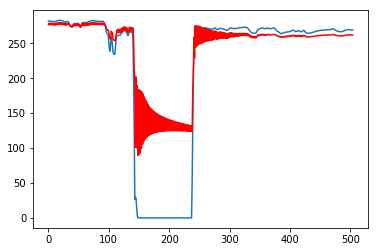

In [33]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [34]:
len(test), len(predictions)

(505, 505)

In [35]:
X = plant_data_non_NA_no_time_9300B_Power.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(1,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=282.305593, expected=282.002827
predicted=281.984500, expected=281.744573
predicted=281.726634, expected=281.767743
predicted=281.749788, expected=281.790913
predicted=281.772948, expected=281.752853
predicted=281.734963, expected=281.642403
predicted=281.624691, expected=281.531953
predicted=281.514422, expected=281.325978
predicted=281.308769, expected=281.085179
predicted=281.068348, expected=280.847407
predicted=280.830955, expected=281.028798
predicted=281.012088, expected=281.210188
predicted=281.193220, expected=281.442015
predicted=281.424718, expected=281.802401
predicted=281.784597, expected=282.162788
predicted=282.144489, expected=282.408540
predicted=282.389916, expected=282.562887
predicted=282.544075, expected=282.717234
predicted=282.698234, expected=282.842776
predicted=282.823627, expected=282.962459
predicted=282.943178, expected=283.040999
predicted=283.021637, expected=282.770961
predicted=282.751979, expected=282.500922
predicted=282.482323, expected=282

C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\sanka\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1728: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


predicted=238.668780, expected=248.951429
predicted=248.995370, expected=259.266452
predicted=259.305649, expected=257.055476
predicted=257.098917, expected=247.034451
predicted=247.091223, expected=237.013427
predicted=237.068414, expected=235.027958
predicted=235.080291, expected=234.030065
predicted=234.080882, expected=234.799552
predicted=234.851272, expected=244.521302
predicted=244.589002, expected=254.243052
predicted=254.308962, expected=260.053717
predicted=260.105689, expected=260.875978
predicted=260.925143, expected=261.698240
predicted=261.744495, expected=261.725995
predicted=261.772083, expected=261.435616
predicted=261.482662, expected=261.145237
predicted=261.193224, expected=262.041025
predicted=262.085806, expected=262.950739
predicted=262.992148, expected=263.998764
predicted=264.036150, expected=265.434382
predicted=265.466065, expected=266.870000
predicted=266.895743, expected=267.822801
predicted=267.844469, expected=268.360315
predicted=268.379642, expected=268

C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=28.482884, expected=16.749121
predicted=16.862886, expected=5.139043
predicted=5.244660, expected=0.045238
predicted=0.146519, expected=0.126401
predicted=0.126401, expected=0.207564
predicted=0.207564, expected=0.153678


C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.254986, expected=0.072514
predicted=0.173493, expected=0.000000
predicted=0.100490, expected=0.000000
predicted=0.100419, expected=0.000000
predicted=0.000001, expected=0.000000
predicted=0.000002, expected=0.000000


C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.099619, expected=0.000000
predicted=0.000003, expected=0.000000
predicted=0.099430, expected=0.000000


C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.099223, expected=0.000000
predicted=0.098899, expected=0.000000
predicted=0.098813, expected=0.000000
predicted=0.098894, expected=0.000000
predicted=0.098294, expected=0.000000
predicted=0.098425, expected=0.000000
predicted=0.098005, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.097583, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000


C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.097033, expected=0.000000
predicted=0.096788, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.096811, expected=0.000000
predicted=0.096523, expected=0.000000
predicted=0.096275, expected=0.000000
predicted=0.095708, expected=0.000000
predicted=0.000003, expected=0.000000
predicted=0.000002, expected=0.000000


C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.000002, expected=0.000000
predicted=0.095294, expected=0.000000
predicted=0.095100, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.094814, expected=0.000000
predicted=0.095037, expected=0.000000

C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)



predicted=0.000000, expected=0.000000
predicted=0.094429, expected=0.000000
predicted=0.094219, expected=0.000000
predicted=0.093977, expected=0.000000
predicted=0.093725, expected=0.000000
predicted=0.000001, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000002, expected=0.000000
predicted=0.092921, expected=0.000000


C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.092510, expected=0.000000
predicted=0.093299, expected=0.000000
predicted=0.000001, expected=0.000000
predicted=0.092146, expected=0.000000
predicted=0.092187, expected=0.000000
predicted=0.091891, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.091696, expected=0.000000
predicted=0.091415, expected=0.000000
predicted=0.091084, expected=0.000000
predicted=0.091229, expected=0.000000
predicted=0.090878, expected=0.000000
predicted=0.091019, expected=0.000000
predicted=0.090731, expected=0.000000
predicted=0.090643, expected=0.000000
predicted=0.000002, expected=0.000000
predicted=0.090215, expected=0.000000
predicted=0.000002, expected=0.000000
predicted=0.090260, expected=0.000000
predicted=0.000002, expected=0.000000
predicted=0.089244, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.089412, expected=0.000000


C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.000000, expected=0.000000
predicted=0.000001, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.088592, expected=0.000000
predicted=0.088518, expected=0.000000
predicted=0.088354, expected=0.000000
predicted=0.088158, expected=0.000000
predicted=0.088340, expected=0.000000
predicted=0.087871, expected=0.000000
predicted=0.000001, expected=0.000000
predicted=0.000002, expected=0.000000
predicted=0.000001, expected=0.000000
predicted=0.000003, expected=0.000000


C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=0.087251, expected=0.000000
predicted=0.087504, expected=0.000000
predicted=0.087027, expected=0.000000
predicted=0.087049, expected=0.000000
predicted=0.086683, expected=0.000000
predicted=0.086528, expected=49.709060
predicted=49.837087, expected=130.281954
predicted=130.489515, expected=210.854847
predicted=210.975417, expected=235.409277
predicted=235.464531, expected=253.149174
predicted=253.153618, expected=268.025248
predicted=267.986446, expected=268.499433
predicted=268.459280, expected=268.973618
predicted=268.932250, expected=269.632858
predicted=269.589498, expected=270.527176
predicted=270.481330, expected=271.421495
predicted=271.373149, expected=271.657576
predicted=271.608493, expected=271.631370
predicted=271.582440, expected=271.605164
predicted=271.556721, expected=271.306337
predicted=271.258382, expected=271.004665
predicted=270.957764, expected=270.867733
predicted=270.821176, expected=271.189446
predicted=271.142002, expected=271.511159
predicted=271.46

predicted=264.389438, expected=264.454044
predicted=264.430682, expected=264.563966
predicted=264.540446, expected=264.673887
predicted=264.649829, expected=264.830246
predicted=264.805876, expected=265.061366
predicted=265.036371, expected=265.292486
predicted=265.267021, expected=265.476553
predicted=265.450438, expected=265.636139
predicted=265.609540, expected=265.795724
predicted=265.768682, expected=266.121842
predicted=266.093852, expected=266.460095
predicted=266.431400, expected=266.817664
predicted=266.787805, expected=267.249371
predicted=267.218286, expected=267.681078
predicted=267.649012, expected=267.909223
predicted=267.876463, expected=267.917968
predicted=267.885206, expected=267.926713
predicted=267.893624, expected=268.110658
predicted=268.077332, expected=268.351188
predicted=268.317139, expected=268.586538
predicted=268.551864, expected=268.657132
predicted=268.622248, expected=268.727727
predicted=268.692576, expected=268.783958
predicted=268.748639, expected=268

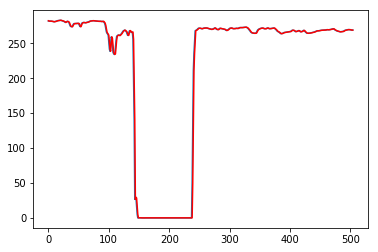

In [36]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [37]:
len(test), len(predictions)

(505, 505)

In [38]:
X = plant_data_non_NA_no_time_9300B_Power.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=282.032752, expected=282.002827
predicted=281.995733, expected=281.744573
predicted=281.571109, expected=281.767743
predicted=281.930423, expected=281.790913
predicted=281.701333, expected=281.752853
predicted=281.806567, expected=281.642403
predicted=281.534145, expected=281.531953
predicted=281.545107, expected=281.325978
predicted=281.176129, expected=281.085179
predicted=281.031254, expected=280.847407
predicted=280.723510, expected=281.028798
predicted=281.272060, expected=281.210188
predicted=281.178181, expected=281.442015
predicted=281.654501, expected=281.802401
predicted=281.928285, expected=282.162788
predicted=282.354004, expected=282.408540
predicted=282.464991, expected=282.562887
predicted=282.652006, expected=282.717234
predicted=282.781989, expected=282.842776
predicted=282.904313, expected=282.962459
predicted=283.022119, expected=283.040999
predicted=283.071266, expected=282.770961
predicted=282.561497, expected=282.500922
predicted=282.471015, expected=282

predicted=-0.164620, expected=0.000000
predicted=-0.164480, expected=0.000000
predicted=-0.164340, expected=0.000000
predicted=-0.164201, expected=0.000000
predicted=-0.164062, expected=0.000000
predicted=-0.163923, expected=0.000000
predicted=-0.163785, expected=0.000000
predicted=-0.163645, expected=0.000000
predicted=-0.163508, expected=0.000000
predicted=-0.163370, expected=0.000000
predicted=-0.163232, expected=0.000000
predicted=-0.163095, expected=0.000000
predicted=-0.162958, expected=0.000000
predicted=-0.162821, expected=0.000000
predicted=-0.162685, expected=0.000000
predicted=-0.162547, expected=0.000000
predicted=-0.162411, expected=0.000000
predicted=-0.162275, expected=0.000000
predicted=-0.162140, expected=0.000000
predicted=-0.162004, expected=0.000000
predicted=-0.161869, expected=0.000000
predicted=-0.161733, expected=0.000000
predicted=-0.161599, expected=0.000000
predicted=-0.161464, expected=0.000000
predicted=-0.161330, expected=0.000000
predicted=-0.161194, expe

predicted=266.815836, expected=266.870275
predicted=266.896678, expected=267.001318
predicted=267.052192, expected=267.709493
predicted=268.029241, expected=268.417667
predicted=268.607367, expected=268.820727
predicted=268.925710, expected=268.689256
predicted=268.575721, expected=268.557786
predicted=268.550265, expected=268.077319
predicted=267.848504, expected=267.398821
predicted=267.180811, expected=266.720322
predicted=266.496573, expected=266.895837
predicted=267.089700, expected=267.153440
predicted=267.184563, expected=267.435524
predicted=267.557762, expected=267.824104
predicted=267.954090, expected=268.212685
predicted=268.339189, expected=268.077152
predicted=267.950745, expected=267.330078
predicted=267.028986, expected=266.583004
predicted=266.366201, expected=266.576618
predicted=266.678553, expected=266.836146
predicted=266.912616, expected=267.099706
predicted=267.190689, expected=267.745807
predicted=268.015966, expected=268.391909
predicted=268.575522, expected=268

In [39]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 59.223


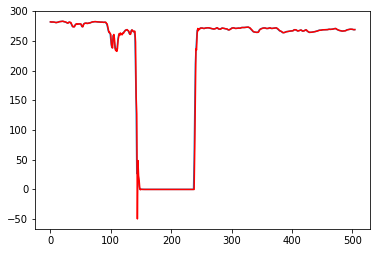

In [40]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [41]:
len(test), len(predictions)

(505, 505)

In [42]:
X = plant_data_non_NA_no_time_9300B_Power.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=282.130451, expected=282.002827
predicted=281.766214, expected=281.744573
predicted=281.555173, expected=281.767743
predicted=281.788545, expected=281.790913
predicted=281.811717, expected=281.752853
predicted=281.727917, expected=281.642403
predicted=281.563372, expected=281.531953
predicted=281.452889, expected=281.325978
predicted=281.175511, expected=281.085179
predicted=280.908629, expected=280.847407
predicted=280.673047, expected=281.028798
predicted=281.167535, expected=281.210188
predicted=281.348969, expected=281.442015
predicted=281.618523, expected=281.802401
predicted=282.075029, expected=282.162788
predicted=282.435524, expected=282.408540
predicted=282.595708, expected=282.562887
predicted=282.681817, expected=282.717234
predicted=282.836201, expected=282.842776
predicted=282.940257, expected=282.962459
predicted=283.055591, expected=283.040999
predicted=283.103417, expected=282.770961
predicted=282.572963, expected=282.500922
predicted=282.302840, expected=282

C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)



predicted=0.057580, expected=0.207564
predicted=0.138877, expected=0.153678
predicted=0.013711, expected=0.072514
predicted=-0.081802, expected=0.000000
predicted=-0.149678, expected=0.000000
predicted=-0.111264, expected=0.000000
predicted=-0.111165, expected=0.000000
predicted=-0.111067, expected=0.000000
predicted=-0.110969, expected=0.000000
predicted=-0.110871, expected=0.000000
predicted=-0.110773, expected=0.000000
predicted=-0.110676, expected=0.000000
predicted=-0.110578, expected=0.000000
predicted=-0.110481, expected=0.000000
predicted=-0.110384, expected=0.000000
predicted=-0.110288, expected=0.000000
predicted=-0.110191, expected=0.000000
predicted=-0.110095, expected=0.000000
predicted=-0.109999, expected=0.000000
predicted=-0.109902, expected=0.000000
predicted=-0.109806, expected=0.000000
predicted=-0.109710, expected=0.000000
predicted=-0.109614, expected=0.000000
predicted=-0.109519, expected=0.000000
predicted=-0.109424, expected=0.000000
predicted=-0.109330, expect

predicted=271.123700, expected=270.984850
predicted=270.735217, expected=270.892205
predicted=270.833306, expected=270.928550
predicted=270.952863, expected=270.964895
predicted=270.989217, expected=271.374186
predicted=271.639178, expected=271.794657
predicted=272.066972, expected=272.004451
predicted=272.140927, expected=271.566751
predicted=271.285455, expected=271.129051
predicted=270.847636, expected=270.953401
predicted=270.840972, expected=271.019822
predicted=271.063553, expected=271.086243
predicted=271.129991, expected=271.272372
predicted=271.393386, expected=271.489479
predicted=271.630530, expected=271.698627
predicted=271.834598, expected=271.800405
predicted=271.867146, expected=271.902184
predicted=271.968950, expected=271.716727
predicted=271.598167, expected=270.981915
predicted=270.508808, expected=270.247103
predicted=269.773800, expected=269.331268
predicted=268.740950, expected=268.303509
predicted=267.640714, expected=267.275751
predicted=266.612678, expected=266

C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=265.209808, expected=265.292486
predicted=265.440989, expected=265.476553
predicted=265.594748, expected=265.636139
predicted=265.738582, expected=265.795724
predicted=265.898208, expected=266.121842
predicted=266.331836, expected=266.460095
predicted=266.678002, expected=266.817664
predicted=267.048125, expected=267.249371
predicted=267.527765, expected=267.681078
predicted=267.959580, expected=267.909223
predicted=268.056464, expected=267.917968
predicted=267.923676, expected=267.926713
predicted=267.932424, expected=268.110658
predicted=268.229436, expected=268.351188
predicted=268.506529, expected=268.586538
predicted=268.738595, expected=268.657132
predicted=268.702922, expected=268.727727
predicted=268.773534, expected=268.783958
predicted=268.820511, expected=268.807430
predicted=268.822858, expected=268.830902
predicted=268.846335, expected=268.856338
predicted=268.873044, expected=268.883200
predicted=268.900833, expected=268.910061
predicted=268.927701, expected=269

C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=266.361839, expected=266.597958
predicted=266.690184, expected=266.741315
predicted=266.833576, expected=266.859326
predicted=266.935264, expected=266.960382
predicted=267.025408, expected=267.061438
predicted=267.126487, expected=267.564481
predicted=267.888981, expected=268.125599
predicted=268.487701, expected=268.634939
predicted=268.963762, expected=268.847073
predicted=268.984213, expected=269.059206
predicted=269.196396, expected=269.261955
predicted=269.393140, expected=269.451902
predicted=269.574876, expected=269.641849
predicted=269.764868, expected=269.662820
predicted=269.676832, expected=269.610434
predicted=269.577108, expected=269.558048
predicted=269.524711, expected=269.314776
predicted=269.158235, expected=269.065984
predicted=268.905822, expected=268.890977
predicted=268.778374, expected=268.941530
predicted=268.974452, expected=268.992082


In [43]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 55.098


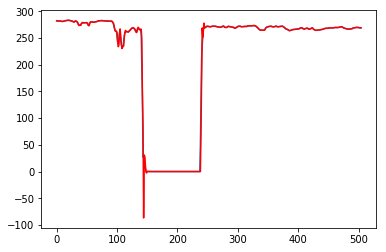

In [44]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [45]:
len(test), len(predictions)

(505, 505)

In [46]:
X = plant_data_non_NA_no_time_9300B_Power.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(1,2,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=281.874243, expected=282.002827
predicted=281.662786, expected=281.744573
predicted=281.506928, expected=281.767743
predicted=281.882517, expected=281.790913
predicted=281.814340, expected=281.752853
predicted=281.695139, expected=281.642403
predicted=281.508627, expected=281.531953
predicted=281.421668, expected=281.325978
predicted=281.089104, expected=281.085179
predicted=280.833154, expected=280.847407
predicted=280.610694, expected=281.028798
predicted=281.346573, expected=281.210188
predicted=281.391941, expected=281.442015
predicted=281.690596, expected=281.802401
predicted=282.204966, expected=282.162788
predicted=282.523660, expected=282.408540
predicted=282.617521, expected=282.562887
predicted=282.687932, expected=282.717234
predicted=282.871924, expected=282.842776
predicted=282.959299, expected=282.962459
predicted=283.080560, expected=283.040999
predicted=283.106486, expected=282.770961
predicted=282.387910, expected=282.500922
predicted=282.230937, expected=282

predicted=0.000592, expected=0.000000
predicted=0.000591, expected=0.000000
predicted=0.000591, expected=0.000000
predicted=0.000590, expected=0.000000
predicted=0.000589, expected=0.000000
predicted=0.000590, expected=0.000000
predicted=0.000589, expected=0.000000
predicted=0.000588, expected=0.000000
predicted=0.000588, expected=0.000000
predicted=0.000587, expected=0.000000
predicted=0.000587, expected=0.000000
predicted=0.000586, expected=0.000000
predicted=0.000586, expected=0.000000
predicted=0.000585, expected=0.000000
predicted=0.000585, expected=0.000000
predicted=0.000585, expected=0.000000
predicted=0.000584, expected=0.000000
predicted=0.000583, expected=0.000000
predicted=0.000583, expected=0.000000
predicted=0.000582, expected=0.000000
predicted=0.000582, expected=0.000000
predicted=0.000580, expected=0.000000
predicted=0.000581, expected=0.000000
predicted=0.000580, expected=0.000000
predicted=0.000580, expected=0.000000
predicted=0.000580, expected=0.000000
predicted=0.

predicted=269.269898, expected=268.689256
predicted=268.637546, expected=268.557786
predicted=268.426632, expected=268.077319
predicted=267.648747, expected=267.398821
predicted=266.749615, expected=266.720322
predicted=266.041684, expected=266.895837
predicted=266.944996, expected=267.153440
predicted=267.399480, expected=267.435524
predicted=267.714626, expected=267.824104
predicted=268.197601, expected=268.212685
predicted=268.602009, expected=268.077152
predicted=268.019820, expected=267.330078
predicted=266.673685, expected=266.583004
predicted=265.835736, expected=266.576618
predicted=266.460583, expected=266.836146
predicted=267.056796, expected=267.099706
predicted=267.363304, expected=267.745807
predicted=268.336017, expected=268.391909
predicted=269.038962, expected=268.563618
predicted=268.806376, expected=267.545361
predicted=266.703475, expected=266.527104
predicted=265.508431, expected=265.724099
predicted=264.888878, expected=265.090474
predicted=264.431587, expected=264

In [47]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 82.596


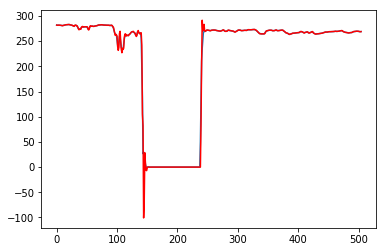

In [48]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [49]:
len(test), len(predictions)

(505, 505)

In [50]:
X = plant_data_non_NA_no_time_9300B_Power.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(0,2,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=281.814962, expected=282.002827
predicted=281.763915, expected=281.744573
predicted=281.477954, expected=281.767743
predicted=281.918752, expected=281.790913
predicted=281.758330, expected=281.752853
predicted=281.712749, expected=281.642403
predicted=281.501320, expected=281.531953
predicted=281.435257, expected=281.325978
predicted=281.072161, expected=281.085179
predicted=280.850258, expected=280.847407
predicted=280.608541, expected=281.028798
predicted=281.395480, expected=281.210188
predicted=281.310796, expected=281.442015
predicted=281.732087, expected=281.802401
predicted=282.194428, expected=282.162788
predicted=282.510038, expected=282.408540
predicted=282.610353, expected=282.562887
predicted=282.696937, expected=282.717234
predicted=282.881049, expected=282.842776
predicted=282.952028, expected=282.962459
predicted=283.087240, expected=283.040999
predicted=283.099701, expected=282.770961
predicted=282.356630, expected=282.500922
predicted=282.294368, expected=282

predicted=0.000834, expected=0.000000
predicted=0.000834, expected=0.000000
predicted=0.000833, expected=0.000000
predicted=0.000832, expected=0.000000
predicted=0.000831, expected=0.000000
predicted=0.000831, expected=0.000000
predicted=0.000830, expected=0.000000
predicted=0.000829, expected=0.000000
predicted=0.000828, expected=0.000000
predicted=0.000828, expected=0.000000
predicted=0.000827, expected=0.000000
predicted=0.000826, expected=0.000000
predicted=0.000826, expected=0.000000
predicted=0.000825, expected=0.000000
predicted=0.000824, expected=0.000000
predicted=0.000824, expected=0.000000
predicted=0.000823, expected=0.000000
predicted=0.000822, expected=0.000000
predicted=0.000822, expected=0.000000
predicted=0.000821, expected=0.000000
predicted=0.000820, expected=0.000000
predicted=0.000820, expected=0.000000
predicted=0.000819, expected=0.000000
predicted=0.000818, expected=0.000000
predicted=0.000817, expected=0.000000
predicted=0.000817, expected=0.000000
predicted=0.

predicted=268.309042, expected=268.417667
predicted=269.106451, expected=268.820727
predicted=269.277809, expected=268.689256
predicted=268.667958, expected=268.557786
predicted=268.447169, expected=268.077319
predicted=267.665935, expected=267.398821
predicted=266.770082, expected=266.720322
predicted=266.051001, expected=266.895837
predicted=266.914123, expected=267.153440
predicted=267.366928, expected=267.435524
predicted=267.705382, expected=267.824104
predicted=268.191176, expected=268.212685
predicted=268.597906, expected=268.077152
predicted=268.039118, expected=267.330078
predicted=266.715199, expected=266.583004
predicted=265.860445, expected=266.576618
predicted=266.436910, expected=266.836146
predicted=267.021714, expected=267.099706
predicted=267.349271, expected=267.745807
predicted=268.318728, expected=268.391909
predicted=269.025188, expected=268.563618
predicted=268.821979, expected=267.545361
predicted=266.765002, expected=266.527104
predicted=265.552884, expected=265

In [51]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 65.583


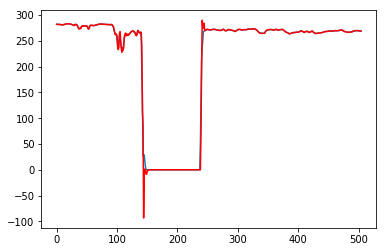

In [52]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [53]:
len(test), len(predictions)

(505, 505)

# Final Results

In [60]:
X = plant_data_non_NA_no_time_9300B_Power.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
v = plant_data_non_NA['Time'][size:len(X)]
v.index = range(len(v))

for t in range(len(test)):
    model = ARIMA(history, order=(0,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    date = v[t]
    #print('date = ' + str(date))
    print('date=' + str(date) + ', predicted=%f, actual=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

date=2018-01-21 08:59:41, predicted=276.767453, actual=282.002827
date=2018-01-21 09:29:41, predicted=278.847017, actual=281.744573
date=2018-01-21 09:59:40, predicted=276.530996, actual=281.767743
date=2018-01-21 10:29:40, predicted=278.864612, actual=281.790913
date=2018-01-21 10:59:40, predicted=276.575938, actual=281.752853
date=2018-01-21 11:29:40, predicted=278.821368, actual=281.642403
date=2018-01-21 11:59:40, predicted=276.487495, actual=281.531953
date=2018-01-21 12:29:40, predicted=278.705521, actual=281.325978
date=2018-01-21 12:59:40, predicted=276.303731, actual=281.085179
date=2018-01-21 13:29:40, predicted=278.459102, actual=280.847407
date=2018-01-21 13:59:40, predicted=276.087616, actual=281.028798
date=2018-01-21 14:29:40, predicted=278.632147, actual=281.210188
date=2018-01-21 14:59:40, predicted=276.290945, actual=281.442015
date=2018-01-21 15:29:40, predicted=278.855742, actual=281.802401
date=2018-01-21 15:59:40, predicted=276.672907, actual=282.162788
date=2018-

date=2018-01-23 23:29:31, predicted=268.488880, actual=268.360315
date=2018-01-23 23:59:30, predicted=273.579362, actual=268.897829
date=2018-01-24 00:29:30, predicted=269.046507, actual=268.327010
date=2018-01-24 00:59:30, predicted=272.982312, actual=267.499910
date=2018-01-24 01:29:30, predicted=268.238672, actual=266.532538
date=2018-01-24 01:59:30, predicted=271.988539, actual=264.089330
date=2018-01-24 02:29:30, predicted=265.818154, actual=261.646122
date=2018-01-24 02:59:30, predicted=269.515027, actual=261.262721
date=2018-01-24 03:29:30, predicted=265.443825, actual=264.523478
date=2018-01-24 03:59:30, predicted=272.731180, actual=267.784236
date=2018-01-24 04:29:30, predicted=268.718534, actual=268.165275
date=2018-01-24 04:59:30, predicted=273.086280, actual=266.896170
date=2018-01-24 05:29:30, predicted=267.469489, actual=265.627064
date=2018-01-24 05:59:30, predicted=271.789647, actual=265.823878
date=2018-01-24 06:29:29, predicted=267.677947, actual=266.165109
date=2018-

C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


date=2018-01-24 14:59:28, predicted=90.688398, actual=0.207564
date=2018-01-24 15:29:28, predicted=182.978311, actual=0.153678
date=2018-01-24 15:59:28, predicted=93.196681, actual=0.072514
date=2018-01-24 16:29:28, predicted=181.646104, actual=0.000000
date=2018-01-24 16:59:28, predicted=99.699124, actual=0.000000
date=2018-01-24 17:29:28, predicted=179.861842, actual=0.000000
date=2018-01-24 17:59:28, predicted=105.898645, actual=0.000000
date=2018-01-24 18:29:27, predicted=177.131405, actual=0.000000
date=2018-01-24 18:59:27, predicted=109.844207, actual=0.000000
date=2018-01-24 19:29:27, predicted=173.149771, actual=0.000000
date=2018-01-24 19:59:27, predicted=112.655361, actual=0.000000
date=2018-01-24 20:29:27, predicted=168.845446, actual=0.000000
date=2018-01-24 20:59:27, predicted=114.791315, actual=0.000000
date=2018-01-24 21:29:27, predicted=165.159802, actual=0.000000
date=2018-01-24 21:59:27, predicted=116.476519, actual=0.000000
date=2018-01-24 22:29:27, predicted=162.115

date=2018-01-27 06:59:18, predicted=255.976247, actual=270.204417
date=2018-01-27 07:29:18, predicted=266.179259, actual=269.884269
date=2018-01-27 07:59:18, predicted=255.985763, actual=269.755902
date=2018-01-27 08:29:17, predicted=265.763443, actual=269.635624
date=2018-01-27 08:59:17, predicted=256.175441, actual=270.364553
date=2018-01-27 09:29:17, predicted=266.197994, actual=271.093482
date=2018-01-27 09:59:17, predicted=257.197175, actual=271.569786
date=2018-01-27 10:29:17, predicted=266.406670, actual=271.409304
date=2018-01-27 10:59:17, predicted=257.331593, actual=271.248821
date=2018-01-27 11:29:17, predicted=265.995318, actual=271.034647
date=2018-01-27 11:59:17, predicted=257.396881, actual=270.778004
date=2018-01-27 12:29:17, predicted=265.504763, actual=270.521361
date=2018-01-27 12:59:17, predicted=257.403589, actual=270.345146
date=2018-01-27 13:29:17, predicted=265.106632, actual=270.185060
date=2018-01-27 13:59:17, predicted=257.491405, actual=269.971864
date=2018-

date=2018-01-29 21:29:08, predicted=261.293690, actual=268.417667
date=2018-01-29 21:59:08, predicted=260.843493, actual=268.820727
date=2018-01-29 22:29:07, predicted=261.682798, actual=268.689256
date=2018-01-29 22:59:07, predicted=260.750787, actual=268.557786
date=2018-01-29 23:29:07, predicted=261.538701, actual=268.077319
date=2018-01-29 23:59:07, predicted=260.317130, actual=267.398821
date=2018-01-30 00:29:07, predicted=260.854184, actual=266.720322
date=2018-01-30 00:59:07, predicted=259.683122, actual=266.895837
date=2018-01-30 01:29:07, predicted=260.999969, actual=267.153440
date=2018-01-30 01:59:07, predicted=259.980873, actual=267.435524
date=2018-01-30 02:29:07, predicted=261.253983, actual=267.824104
date=2018-01-30 02:59:07, predicted=260.404931, actual=268.212685
date=2018-01-30 03:29:07, predicted=261.617068, actual=268.077152
date=2018-01-30 03:59:07, predicted=260.318612, actual=267.330078
date=2018-01-30 04:29:07, predicted=260.863385, actual=266.583004
date=2018-

In [61]:
len(test), len(predictions), len(plant_data_non_NA['Time'][size:len(X)])

(505, 505, 505)

In [62]:
plot_df = DataFrame()
plot_df['Time'] = plant_data_non_NA['Time'][size:len(X)]
plot_df['Actual Values'] = test
plot_df['Predicted Values'] = predictions

In [63]:
plot_df['Predicted Values'] = plot_df['Predicted Values'].map(lambda x: float(x))

In [64]:
plot_df = plot_df.set_index(keys = 'Time')

In [67]:
plot_df.head()

,Actual Values,Predicted Values
Time,,
2018-01-21 08:59:41,282.002827,276.767453
2018-01-21 09:29:41,281.744573,278.847017
2018-01-21 09:59:40,281.767743,276.530996
2018-01-21 10:29:40,281.790913,278.864612
2018-01-21 10:59:40,281.752853,276.575938


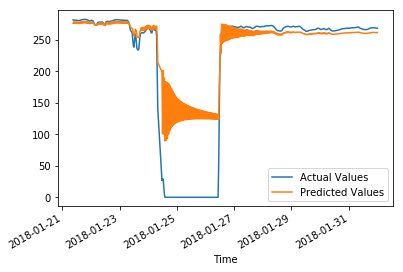

In [68]:
plot_df.plot()